# Loan Eligibility Notebook

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether loans would be approved or not.


## I. Problem Statement

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 

## II. Data

The dataset can be viewed or dwonloaded on Kaggle: -> https://www.kaggle.com/datasets/devzohaib/eligibility-prediction-for-loan/data

## III. Features

Data Dictionary:
* `Loan_ID` 	Unique Loan ID
* `Gender` 	Male/ Female
* `Married` 	Applicant married (Y/N)
* `Dependents` 	Number of dependents
* `Education` 	Applicant Education (Graduate/ Under Graduate)
* `Self_Employed` 	Self employed (Y/N)
* `ApplicantIncome` 	Applicant income
* `CoapplicantIncome` 	Coapplicant income
* `LoanAmount` 	Loan amount in thousands
* `Loan_Amount_Term` 	Term of loan in months
* `Credit_History` 	credit history meets guidelines
* `Property_Area` 	Urban/ Semi Urban/ Rural
* `Loan_Status` 	(Target) Loan approved (Y/N)

## IV. Evaluation

* ROC Curve and AUC Score
* Confusion Matrix
* Classification Report
* Precision
* Recall
* F1 Score

# Imports

In [94]:
%matplotlib inline 

import warnings as warn
warn.filterwarnings('ignore')
from pprint import pprint
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# import models
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import accuracy_score


In [2]:
SEABORN_STYLE = 'whitegrid'
plt.style.use('ggplot')

# Getting the data ready:

In [3]:
df = pd.read_csv("Loan_Data.csv")

In [4]:
# Define constants:

SEABORN_STYLE = 'whitegrid'

In [5]:
df.head().T

,0,1,2,3,4
Loan_ID,LP001002,LP001003,LP001005,LP001006,LP001008
Gender,Male,Male,Male,Male,Male
Married,No,Yes,Yes,Yes,No
Dependents,0,1,0,0,0
Education,Graduate,Graduate,Graduate,Not Graduate,Graduate
Self_Employed,No,No,Yes,No,No
ApplicantIncome,5849,4583,3000,2583,6000
CoapplicantIncome,0.0,1508.0,0.0,2358.0,0.0
LoanAmount,NaN,128.0,66.0,120.0,141.0
Loan_Amount_Term,360.0,360.0,360.0,360.0,360.0


In [6]:
df.tail().T

,609,610,611,612,613
Loan_ID,LP002978,LP002979,LP002983,LP002984,LP002990
Gender,Female,Male,Male,Male,Female
Married,No,Yes,Yes,Yes,No
Dependents,0,3+,1,2,0
Education,Graduate,Graduate,Graduate,Graduate,Graduate
Self_Employed,No,No,No,No,Yes
ApplicantIncome,2900,4106,8072,7583,4583
CoapplicantIncome,0.0,0.0,240.0,0.0,0.0
LoanAmount,71.0,40.0,253.0,187.0,133.0
Loan_Amount_Term,360.0,180.0,360.0,360.0,360.0


# Part I. Data Analysis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
len(df)

614

In [10]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
# Drop Loan ID, it's just a number given to identify each loan
df.drop('Loan_ID', axis=1, inplace=True)

df.shape

(614, 12)

In [12]:
df.duplicated().sum()

0

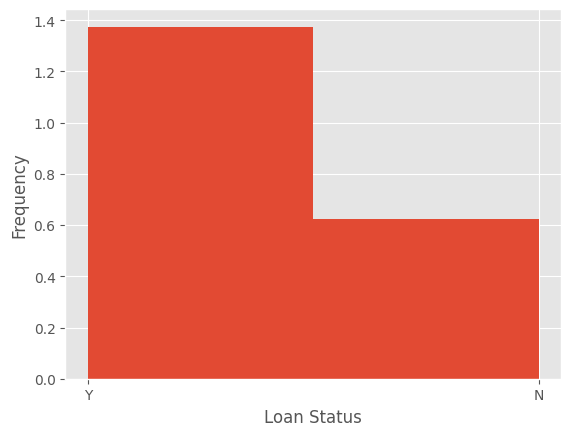

In [13]:
# Explore the target column:
df["Loan_Status"].hist(bins=2, density=True)
plt.ylabel("Frequency")
plt.xlabel("Loan Status")
plt.show()

Observation:

* The majority of people in the dataset do have home loans.

Gender
Male      489
Female    112
Name: count, dtype: int64




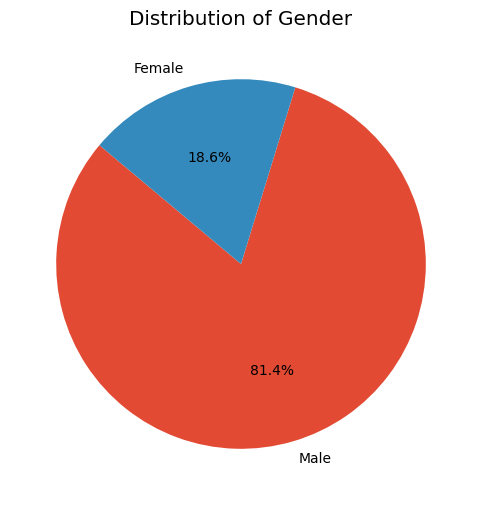

In [14]:
# How many males and females are in the dataset?
gender_counts = df["Gender"].value_counts()

print(gender_counts)
print("\n")

plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Gender")

plt.show()

In [15]:
majority_gender = gender_counts.idxmax()
percentage_majority_gender = (gender_counts[majority_gender] / gender_counts.sum()) * 100

print(f"Observation: The majority of dataset gender is {majority_gender}'s who apply for home loans, at {percentage_majority_gender:.2f} %.")

Observation: The majority of dataset gender is Male's who apply for home loans, at 81.36 %.


In [16]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [17]:
# How many men and women are married who apply for home loans?

gender_married_counts = df.groupby(['Gender', 'Married']).size()

print(gender_married_counts)

Gender  Married
Female  No          80
        Yes         31
Male    No         130
        Yes        357
dtype: int64


In [18]:
gender_married_counts_1 = df.groupby(['Gender', 'Married', 'Loan_Status']).size()

print(gender_married_counts_1)

Gender  Married  Loan_Status
Female  No       N               29
                 Y               51
        Yes      N                8
                 Y               23
Male    No       N               49
                 Y               81
        Yes      N              101
                 Y              256
dtype: int64


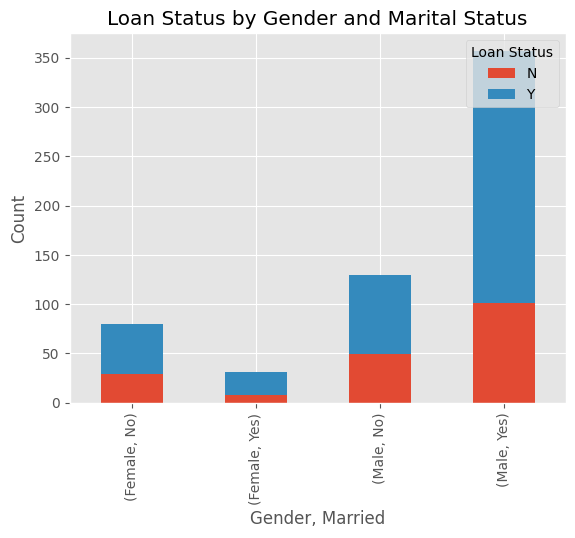

In [19]:
# Visualize the data in a plot
df_plot = gender_married_counts_1.reset_index(name='Count')

# Create a pivot table for plotting
pivot_df = df_plot.pivot_table(index=['Gender', 'Married'], columns='Loan_Status', values='Count', fill_value=0)

# Plot a stacked bar chart
pivot_df.plot(kind='bar', stacked=True)
plt.title('Loan Status by Gender and Marital Status')
plt.xlabel('Gender, Married')
plt.ylabel('Count')
plt.legend(title='Loan Status', loc='upper right')

# Show the plot
plt.show()


Self_Employed        No  Yes
Gender Loan_Status          
Female N             29    6
       Y             60    9
Male   N            123   20
       Y            279   43




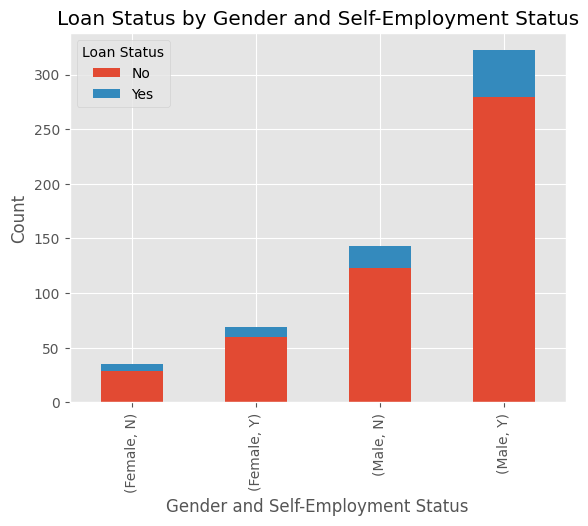

In [20]:
# Are the majority of people whow have a home loan self employed or employed ?
filtered_df = df[df['Gender'].isin(['Male', 'Female'])]

# Group the data:
result = filtered_df.groupby(['Gender', 'Loan_Status', 'Self_Employed'])['Gender'].count().unstack()

print(result)
print("\n")

# Create bar plot to visualize the data:
result.plot(kind='bar', stacked=True)

# Set plot information:
plt.xlabel('Gender and Self-Employment Status')
plt.ylabel('Count')
plt.title('Loan Status by Gender and Self-Employment Status')
plt.legend(title='Loan Status', loc='upper left')
plt.show()

In [21]:
df.head().T

,0,1,2,3,4
Gender,Male,Male,Male,Male,Male
Married,No,Yes,Yes,Yes,No
Dependents,0,1,0,0,0
Education,Graduate,Graduate,Graduate,Not Graduate,Graduate
Self_Employed,No,No,Yes,No,No
ApplicantIncome,5849,4583,3000,2583,6000
CoapplicantIncome,0.0,1508.0,0.0,2358.0,0.0
LoanAmount,NaN,128.0,66.0,120.0,141.0
Loan_Amount_Term,360.0,360.0,360.0,360.0,360.0
Credit_History,1.0,1.0,1.0,1.0,1.0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [23]:
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']


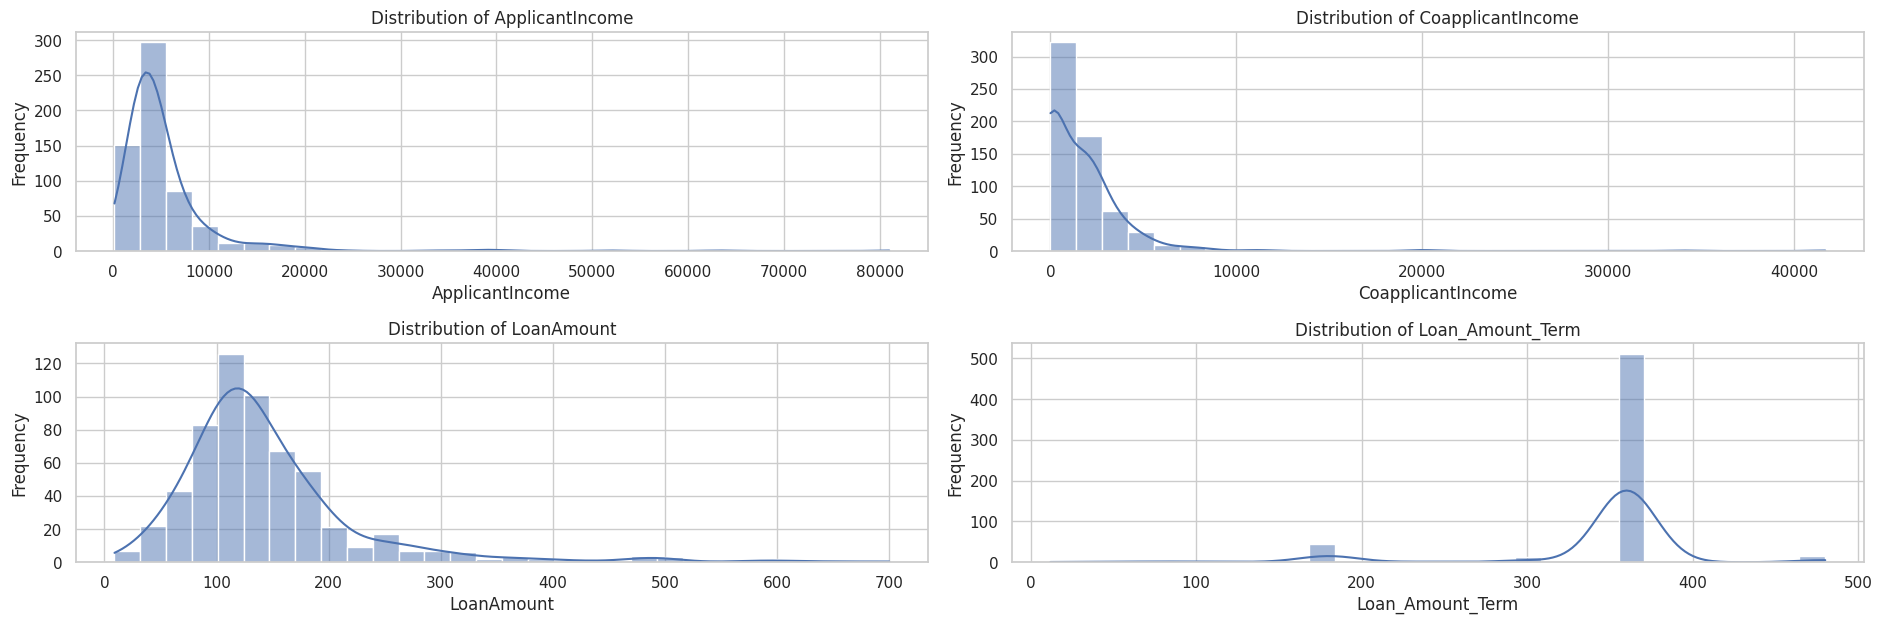

In [24]:
def plot_numerical_histplots(df, numerical_columns):
    """
    Plot Seaborn histplot for all numerical columns in the DataFrame.
    
    Parameters:
    df (pd.DataFrame): Input DataFrame
    numerical_columns (list of str): List of numerical column names in the DataFrame
    """
    # Set up matplotlib figire with a size for each subplot
    plt.figure(figsize=(19, 9))
    
    # Iterate over the list of numeric columns
    for idx, col in enumerate(numerical_columns, 1):
        # Set the style of the plots
        sns.set(style=SEABORN_STYLE)
        # Create a subplot for each column
        plt.subplot(3, 2, idx)
        # Plot histplot for each numerical column
        sns.histplot(data=df[col], kde=True, bins=30)
        # Set the plot title
        plt.title(f'Distribution of {col}')
        # Set xlabel plot
        plt.xlabel(col)
        # Set ylabel plot
        plt.ylabel('Frequency')
        
    # Adjust layout:
    plt.tight_layout()
    # Show the plots
    plt.show()
    
# Call the function:
plot_numerical_histplots(df, numerical_columns);

Observations:

* The distribution of `ApplicantIncome` and `CoApplicantIncome` is skewed to the left
* ` LoanAmount` has a normal distribution and is could be skewed due to outliers.
* `Applicant` and `CoApplicantIncome` seems to be equal for individuals who have a home loan

In [25]:
df.head().T

,0,1,2,3,4
Gender,Male,Male,Male,Male,Male
Married,No,Yes,Yes,Yes,No
Dependents,0,1,0,0,0
Education,Graduate,Graduate,Graduate,Not Graduate,Graduate
Self_Employed,No,No,Yes,No,No
ApplicantIncome,5849,4583,3000,2583,6000
CoapplicantIncome,0.0,1508.0,0.0,2358.0,0.0
LoanAmount,NaN,128.0,66.0,120.0,141.0
Loan_Amount_Term,360.0,360.0,360.0,360.0,360.0
Credit_History,1.0,1.0,1.0,1.0,1.0


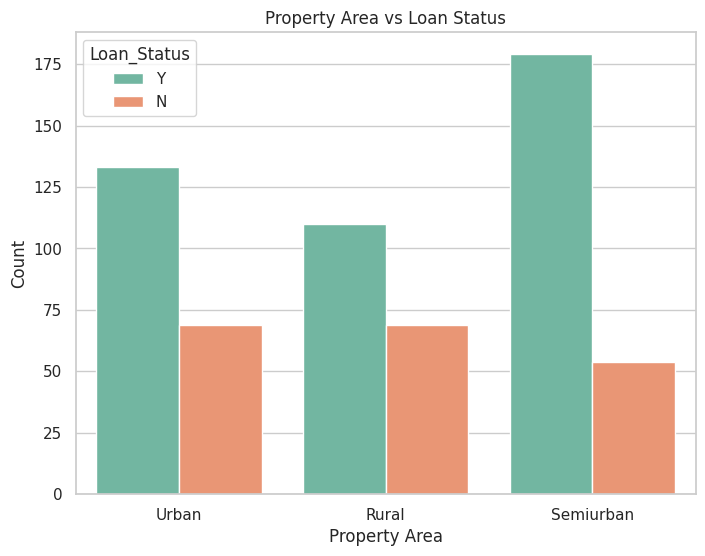

In [26]:
plt.figure(figsize=(8, 6))

# Create a count plot:
sns.countplot(data=df, x="Property_Area", hue="Loan_Status", palette="Set2")

# Add labels and a title:
plt.xlabel("Property Area")
plt.ylabel("Count")
plt.title("Property Area vs Loan Status")

plt.show()

Observation:

* The majority of loans are from the semi-urban area, with rural property area having the least loans.

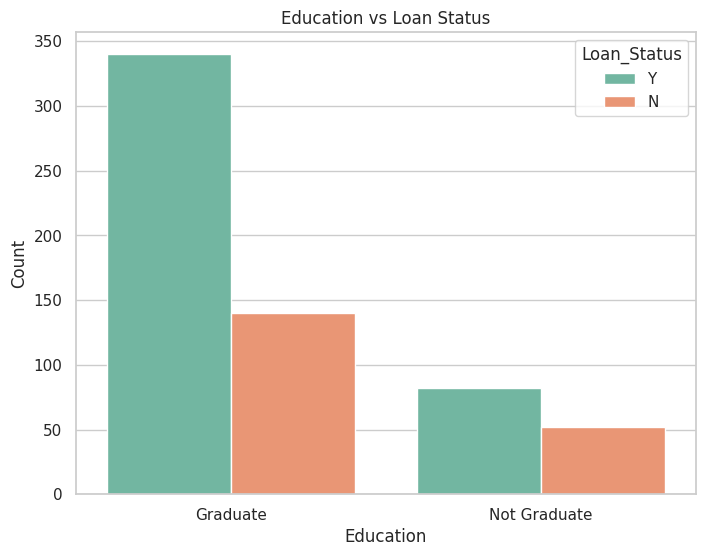

In [27]:
plt.figure(figsize=(8, 6))

# Create a count plot:
sns.countplot(data=df, x="Education", hue="Loan_Status", palette="Set2")

# Add labels and a title:
plt.xlabel("Education")
plt.ylabel("Count")
plt.title("Education vs Loan Status")

plt.show()

Observation:

* Graduates have more loans than that of individuals who are not graduates.

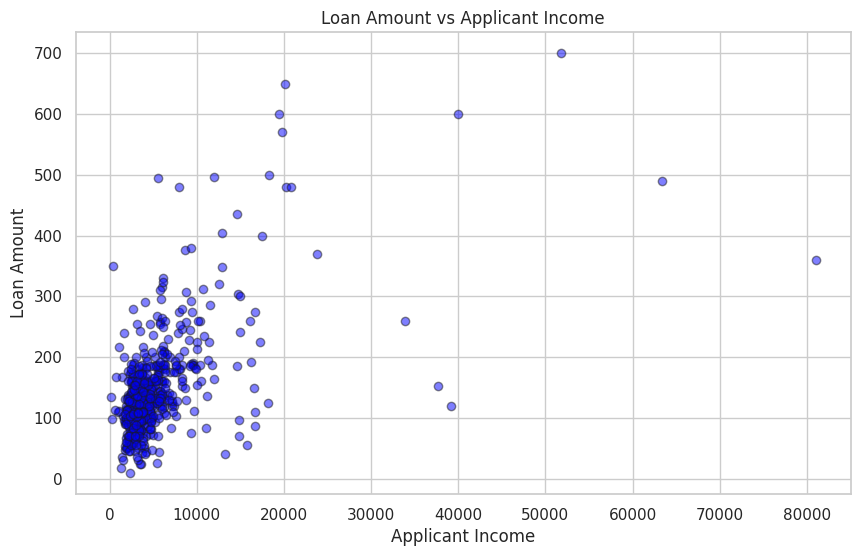

In [28]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['ApplicantIncome'], df['LoanAmount'], alpha=0.5, c='blue', edgecolors='k')

# Add labels and a title
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.title('Loan Amount vs Applicant Income')

# Display the plot
plt.show()

Observation:

* It seems that as the applicant income increases, the loan amount tends to increase as well.

In [29]:
# Loan Amount term:
df["Loan_Amount_Term"].min(), df["Loan_Amount_Term"].max()

(12.0, 480.0)

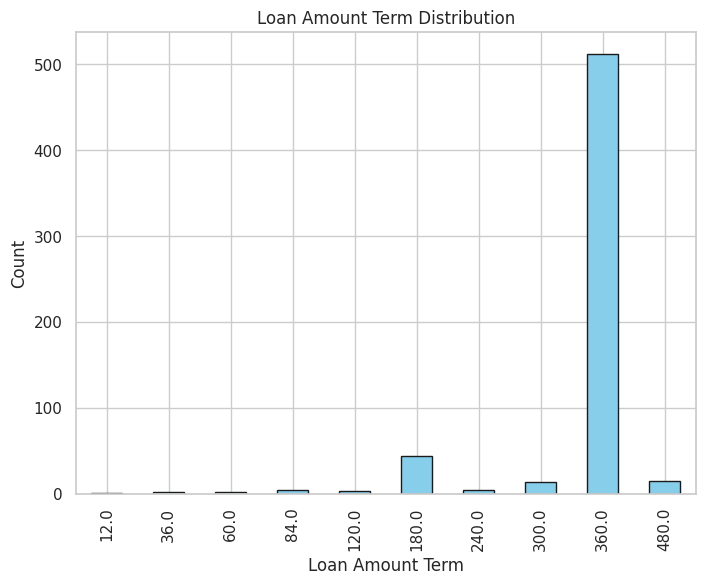

In [30]:
# Create a bar plot for Loan Amount Term:
plt.figure(figsize=(8, 6))
loan_term_counts = df['Loan_Amount_Term'].value_counts().sort_index()
loan_term_counts.plot(kind='bar', color='skyblue', edgecolor='k')

# Add labels and a title:
plt.xlabel('Loan Amount Term')
plt.ylabel('Count')
plt.title('Loan Amount Term Distribution')
plt.show()

Observation:

* The most popular Loan Amount Term is 360 by far.

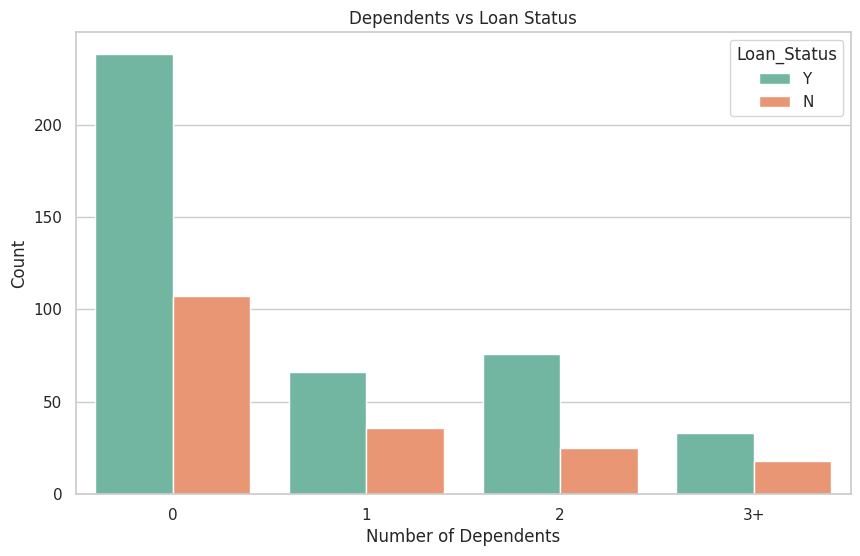

In [31]:
# Are dependents and loan status somehow related?:

# Create a count plot for Dependents vs Loan Status:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Dependents", hue="Loan_Status", palette="Set2")

# Add labels and a title:
plt.xlabel("Number of Dependents")
plt.ylabel("Count")
plt.title("Dependents vs Loan Status")
plt.show()


Observation: 
* Loan status seems to decrease has dependents increase. The majority of Y status has 0 dependents.

# Part II. Data Transformation

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [33]:
# Check for missing values:
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [35]:
df.head().T

,0,1,2,3,4
Gender,Male,Male,Male,Male,Male
Married,No,Yes,Yes,Yes,No
Dependents,0,1,0,0,0
Education,Graduate,Graduate,Graduate,Not Graduate,Graduate
Self_Employed,No,No,Yes,No,No
ApplicantIncome,5849,4583,3000,2583,6000
CoapplicantIncome,0.0,1508.0,0.0,2358.0,0.0
LoanAmount,NaN,128.0,66.0,120.0,141.0
Loan_Amount_Term,360.0,360.0,360.0,360.0,360.0
Credit_History,1.0,1.0,1.0,1.0,1.0


In [36]:
# Gender:

missing_values_in_gender = df['Gender'].isnull().sum()
print("Number of missing values in the 'Gender' column:", missing_values_in_gender)

Number of missing values in the 'Gender' column: 13


In [38]:
# Drop the rows with missing values in the Gender column:
df.dropna(subset=['Gender'], inplace=True)

In [39]:
# Check for missing values in Gender:
missing_values_in_gender = df['Gender'].isnull().sum()
print("Number of missing values in the 'Gender' column:", missing_values_in_gender)

Number of missing values in the 'Gender' column: 0


In [40]:
# Replace Male with 1 and Female with 0:
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})
df['Gender'] = df['Gender'].astype(float)

In [41]:
df['Gender'].dtype

dtype('float64')

In [42]:
# Married:

missing_values_in_married = df['Married'].isnull().sum()
print("Number of missing values in the 'Married' column: ", missing_values_in_married)

Number of missing values in the 'Married' column:  3


In [44]:
# Drop the rows with missing values in Married:
df.dropna(subset=['Married'], inplace=True)

In [45]:
missing_values_in_married = df['Married'].isnull().sum()
print("Number of missing values in the 'Married' column: ", missing_values_in_married)

Number of missing values in the 'Married' column:  0


In [46]:
# Replace No with 0, and Yes with 1:
df['Married'] = df['Married'].replace({'No': 0, 'Yes':1})
df['Married'] = df['Married'].astype(float)

In [47]:
df['Married'].dtype

dtype('float64')

In [49]:
df.head().T

,0,1,2,3,4
Gender,1.0,1.0,1.0,1.0,1.0
Married,0.0,1.0,1.0,1.0,0.0
Dependents,0,1,0,0,0
Education,Graduate,Graduate,Graduate,Not Graduate,Graduate
Self_Employed,No,No,Yes,No,No
ApplicantIncome,5849,4583,3000,2583,6000
CoapplicantIncome,0.0,1508.0,0.0,2358.0,0.0
LoanAmount,NaN,128.0,66.0,120.0,141.0
Loan_Amount_Term,360.0,360.0,360.0,360.0,360.0
Credit_History,1.0,1.0,1.0,1.0,1.0


In [52]:
# Education:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [53]:
# Replace 'Graduate' with 1, and 'Not Graduate' with 0:
df['Education'] = df['Education'].replace({'Graduate': 1, 'Not Graduate': 0})
df['Education'] = df['Education'].astype(float)

In [54]:
missing_values_in_education = df['Education'].isnull().sum()
print("Number of missing values in the 'Education' column: ", missing_values_in_education)

Number of missing values in the 'Education' column:  0


In [55]:
df['Education'].dtype

dtype('float64')

In [56]:
# Self employed:

df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [57]:
missing_values_in_self_employed = df['Self_Employed'].isnull().sum()
print("Number of missing values un the 'Self_Employed' column: ", missing_values_in_education)

Number of missing values un the 'Self_Employed' column:  0


In [58]:
# Replace 'No' with 0, and 'Yes' with 1:

df['Self_Employed'] = df['Self_Employed'].replace({'No': 0, 'Yes': 1})
df['Self_Employed'] = df['Self_Employed'].astype(float)

In [59]:
df['Self_Employed'].dtype

dtype('float64')

In [60]:
df.head().T

,0,1,2,3,4
Gender,1.0,1.0,1.0,1.0,1.0
Married,0.0,1.0,1.0,1.0,0.0
Dependents,0,1,0,0,0
Education,1.0,1.0,1.0,0.0,1.0
Self_Employed,0.0,0.0,1.0,0.0,0.0
ApplicantIncome,5849,4583,3000,2583,6000
CoapplicantIncome,0.0,1508.0,0.0,2358.0,0.0
LoanAmount,NaN,128.0,66.0,120.0,141.0
Loan_Amount_Term,360.0,360.0,360.0,360.0,360.0
Credit_History,1.0,1.0,1.0,1.0,1.0


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 598 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             598 non-null    float64
 1   Married            598 non-null    float64
 2   Dependents         586 non-null    object 
 3   Education          598 non-null    float64
 4   Self_Employed      566 non-null    float64
 5   ApplicantIncome    598 non-null    int64  
 6   CoapplicantIncome  598 non-null    float64
 7   LoanAmount         577 non-null    float64
 8   Loan_Amount_Term   584 non-null    float64
 9   Credit_History     549 non-null    float64
 10  Property_Area      598 non-null    object 
 11  Loan_Status        598 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 60.7+ KB


In [62]:
# Dependents:

missing_values_in_dependents = df['Dependents'].isnull().sum()
print("Number of missing values in 'Dependents' column: ", missing_values_in_dependents)

Number of missing values in 'Dependents' column:  12


In [63]:
# Drop the rows with missing values in the column:
df.dropna(subset=['Dependents'], inplace=True)

In [64]:
# Check that there are no missing values:

missing_values_in_dependents = df['Dependents'].isnull().sum()
print("Number of missing values in 'Dependents' column: ", missing_values_in_dependents)

Number of missing values in 'Dependents' column:  0


In [65]:
df['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [67]:
# Replace 3+ with 3, take note that '3' would now mean three or more dependents:
df['Dependents'] = df['Dependents'].replace({'3+': 3})
df['Dependents'] = df['Dependents'].astype(float)

In [68]:
df['Dependents'].dtype

dtype('float64')

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 586 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             586 non-null    float64
 1   Married            586 non-null    float64
 2   Dependents         586 non-null    float64
 3   Education          586 non-null    float64
 4   Self_Employed      554 non-null    float64
 5   ApplicantIncome    586 non-null    int64  
 6   CoapplicantIncome  586 non-null    float64
 7   LoanAmount         566 non-null    float64
 8   Loan_Amount_Term   573 non-null    float64
 9   Credit_History     537 non-null    float64
 10  Property_Area      586 non-null    object 
 11  Loan_Status        586 non-null    object 
dtypes: float64(9), int64(1), object(2)
memory usage: 59.5+ KB


In [70]:
# Property Area:

df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [72]:
# Check for missing values:

missing_values_in_property_area = df['Property_Area'].isnull().sum()
print("Number of missing values in 'Properrty_Area' column: ", missing_values_in_property_area)

Number of missing values in 'Properrty_Area' column:  0


In [73]:
# Replace 'Urban' with 1, 'Rural' with 2, 'Semiurban' with 3

df['Property_Area'] = df['Property_Area'].replace({'Urban': 1, 'Rural': 2, 'Semiurban': 3})
df['Property_Area'] = df['Property_Area'].astype(float)

In [74]:
df['Property_Area'].dtype

dtype('float64')

In [75]:
# Loan Status:

df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [77]:
# Check for missing values:

missing_values_in_loan_status = df['Loan_Status'].isnull().sum()
print("Number of missing values in 'Loan_Status' column: ", missing_values_in_loan_status)

Number of missing values in 'Loan_Status' column:  0


In [78]:
# Replace 'Y' with 1, and 'N' with 0:
df['Loan_Status'] = df['Loan_Status'].replace({'Y': 1, 'N': 0})
df['Loan_Status'] = df['Loan_Status'].astype(float)

In [79]:
df['Loan_Status'].dtype

dtype('float64')

In [80]:
df.head().T

,0,1,2,3,4
Gender,1.0,1.0,1.0,1.0,1.0
Married,0.0,1.0,1.0,1.0,0.0
Dependents,0.0,1.0,0.0,0.0,0.0
Education,1.0,1.0,1.0,0.0,1.0
Self_Employed,0.0,0.0,1.0,0.0,0.0
ApplicantIncome,5849.0,4583.0,3000.0,2583.0,6000.0
CoapplicantIncome,0.0,1508.0,0.0,2358.0,0.0
LoanAmount,NaN,128.0,66.0,120.0,141.0
Loan_Amount_Term,360.0,360.0,360.0,360.0,360.0
Credit_History,1.0,1.0,1.0,1.0,1.0


In [84]:
df.isnull().sum(), df.isna().sum()

(Gender                0
 Married               0
 Dependents            0
 Education             0
 Self_Employed        32
 ApplicantIncome       0
 CoapplicantIncome     0
 LoanAmount           20
 Loan_Amount_Term     13
 Credit_History       49
 Property_Area         0
 Loan_Status           0
 dtype: int64,
 Gender                0
 Married               0
 Dependents            0
 Education             0
 Self_Employed        32
 ApplicantIncome       0
 CoapplicantIncome     0
 LoanAmount           20
 Loan_Amount_Term     13
 Credit_History       49
 Property_Area         0
 Loan_Status           0
 dtype: int64)

In [86]:
# Check for NaN values in the DataFrame:
nan_values = df.isna()

# Count NaN values in each column:
nan_counts = nan_values.sum()

# Display columns with NaN values and their respective counts:
print("Columns with NaN values and their counts:")
print(nan_counts[nan_counts > 0])


Columns with NaN values and their counts:
Self_Employed       32
LoanAmount          20
Loan_Amount_Term    13
Credit_History      49
dtype: int64


In [87]:
# Calculate the median for each column:
medians = df.median()

# Replace NaN values with the respective column median:
df.fillna(medians, inplace=True)

In [88]:
# Check for NaN values in the DataFrame:
nan_values = df.isna()

# Count NaN values in each column:
nan_counts = nan_values.sum()

# Display columns with NaN values and their respective counts:
print("Columns with NaN values and their counts:")
print(nan_counts[nan_counts > 0])


Columns with NaN values and their counts:
Series([], dtype: int64)


In [89]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Part III: Modelling

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 586 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             586 non-null    float64
 1   Married            586 non-null    float64
 2   Dependents         586 non-null    float64
 3   Education          586 non-null    float64
 4   Self_Employed      586 non-null    float64
 5   ApplicantIncome    586 non-null    int64  
 6   CoapplicantIncome  586 non-null    float64
 7   LoanAmount         586 non-null    float64
 8   Loan_Amount_Term   586 non-null    float64
 9   Credit_History     586 non-null    float64
 10  Property_Area      586 non-null    float64
 11  Loan_Status        586 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 59.5 KB


In [91]:
len(df)

586

Estimators:
* Logistic Regression
* KNN
* Random Forest
* LinearSVC

In [98]:
# Split the data:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# Split into training and test sets:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3)



In [109]:
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "LinearSVC": LinearSVC()}

def assess_classification_model(model, X_train, X_test, y_train, y_test):
    """
    Evaluates a classification model using various metrics and prints the results.

    Parameters:
    - model (sklearn estimator): The classification model to be evaluated.
    - x_train (array-like): The training data features.
    - x_test (array-like): The testing data features.
    - y_train (array-like): The training data labels.
    - y_test (array-like): The testing data labels.

    Returns:
    - metrics_dict (dict): A dictionary containing the following classification metrics:
        - "Train Accuracy" (float): The accuracy of the model on the training data.
        - "Test Accuracy" (float): The accuracy of the model on the testing data.
        - "Precision" (float): The precision of the model on the testing data.
        - "Recall" (float): The recall of the model on the testing data.
        - "F1 Score" (float): The F1 score of the model on the testing data.

    This function fits the provided classification model to the training data,
    calculates various classification metrics, and prints the results. It also
    provides a dictionary containing these metrics for further analysis.
    """
    # Fit the model and get predictions:
    model.fit(X_train, y_train)
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # Calculate scores for training and test sets:
    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)
    precision = precision_score(y_test, test_preds)
    recall = recall_score(y_test, test_preds)
    f1 = f1_score(y_test, test_preds)
    conf_matrix = confusion_matrix(y_test, test_preds)

    # Print metrics:
    print(f"Training Accuracy: {train_accuracy:.2f}")
    print(f"Test Accuracy: {test_accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print("Confusion Matrix:")
    print(conf_matrix)

    # Comment on overfitting/underfitting:
    if train_accuracy > test_accuracy + 0.1: # is the difference between training accuracy and testing accuracy  > 10%
        print("The model might be overfitting.","\n")
    elif train_accuracy + 0.1 < test_accuracy:  # Model performs much better on test than train
        print("This is unusual, check if the data sets were correctly used.","\n")
    elif train_accuracy < 0.6 and test_accuracy < 0.6:
        print("The model might be underfitting.","\n")
    else:
        print("The model seems well-fitted.","\n")

    # Return metrics as a dictionary:
    metrics_dict = {
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

    return metrics_dict

# Plot metrics dict for graphing plots later:
plot_dict = { }

for name, model in models.items():
    print(f"Evaluating {name}:\n")
    metrics = assess_classification_model(model, X_train, X_test, y_train, y_test)
    print("-","\n")
    plot_dict[name] = metrics


Evaluating Logistic Regression:

Training Accuracy: 0.80
Test Accuracy: 0.82
Precision: 0.82
Recall: 0.96
F1 Score: 0.88
Confusion Matrix:
[[ 26  26]
 [  5 119]]
The model seems well-fitted. 

- 

Evaluating KNN:

Training Accuracy: 0.74
Test Accuracy: 0.65
Precision: 0.72
Recall: 0.83
F1 Score: 0.77
Confusion Matrix:
[[ 12  40]
 [ 21 103]]
The model seems well-fitted. 

- 

Evaluating Random Forest:

Training Accuracy: 1.00
Test Accuracy: 0.81
Precision: 0.82
Recall: 0.94
F1 Score: 0.87
Confusion Matrix:
[[ 26  26]
 [  8 116]]
The model might be overfitting. 

- 

Evaluating LinearSVC:

Training Accuracy: 0.69
Test Accuracy: 0.70
Precision: 0.70
Recall: 0.99
F1 Score: 0.82
Confusion Matrix:
[[  0  52]
 [  1 123]]
The model seems well-fitted. 

- 



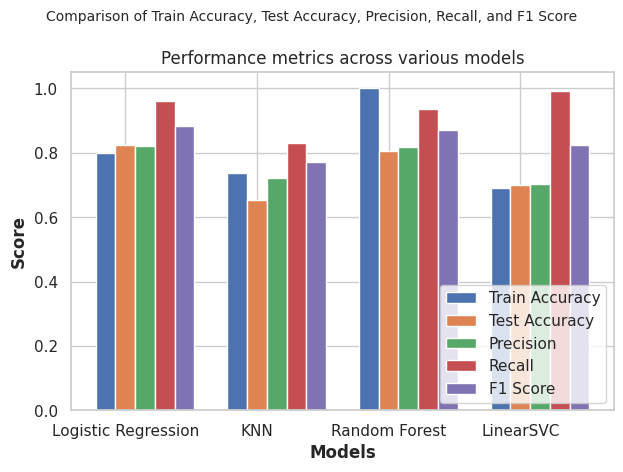

In [111]:
# Extract metrics from plot_dict:
metrics_to_plot = ["Train Accuracy", "Test Accuracy", "Precision", "Recall", "F1 Score"]
models = list(plot_dict.keys())

data = {metric: [plot_dict[model][metric] for model in models] for metric in metrics_to_plot}

barWidth = 0.15
r = np.arange(len(models))

# Create bars:
for i, metric in enumerate(metrics_to_plot):
    plt.bar([x + i*barWidth for x in r], data[metric], width=barWidth, label=metric)

# Title & subtitle:
plt.title('Performance metrics across various models')
plt.suptitle('Comparison of Train Accuracy, Test Accuracy, Precision, Recall, and F1 Score', fontsize=10)
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(models))], models)
plt.ylabel('Score', fontweight='bold')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Hyperparameter Tuning:

In [115]:
# Tune KNN:

train_scores = []
test_scores = []

# Create list of different values for n_neighbors i.e the number of time to loop:
neighbors = range(1, 21)

# Setup KNN instance:
knn = KNeighborsClassifier()

# Loop through different n_neighbors:
for i in neighbors:
    knn.set_params(n_neighbors=i)

    # Fit model:
    knn.fit(X_train, y_train)

    # Update training score list:
    train_scores.append(knn.score(X_train, y_train))

    # Update test scores list:
    test_scores.append(knn.score(X_test, y_test))

# Visual inpection of results:
print("-")

print(f"Training score results:")
print("\n")
for score in train_scores:
    print(score)
print("\n")

print("-")

print(f"Test score resutls:")
for score in train_scores:
    print(score)
print("\n")

-
Training score results:


1.0
0.8048780487804879
0.7804878048780488
0.7585365853658537
0.7365853658536585
0.7121951219512195
0.7121951219512195
0.6951219512195121
0.7024390243902439
0.7
0.7121951219512195
0.7024390243902439
0.7
0.7073170731707317
0.7
0.7146341463414634
0.7024390243902439
0.7097560975609756
0.6951219512195121
0.6902439024390243


-
Test score resutls:
1.0
0.8048780487804879
0.7804878048780488
0.7585365853658537
0.7365853658536585
0.7121951219512195
0.7121951219512195
0.6951219512195121
0.7024390243902439
0.7
0.7121951219512195
0.7024390243902439
0.7
0.7073170731707317
0.7
0.7146341463414634
0.7024390243902439
0.7097560975609756
0.6951219512195121
0.6902439024390243




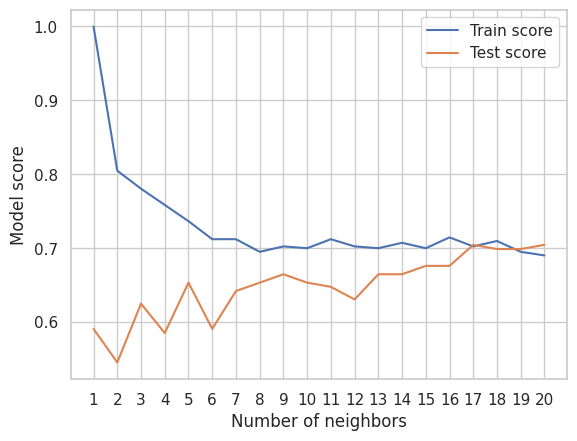



Maximum KNN score for test data: 70.45%


In [116]:
# Visualize the above:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()
plt.show()
print("\n")
print(f"Maximum KNN score for test data: {max(test_scores)*100:.2f}%")

Observation:
* I have improved the KNN from 65.00% --> 70.45%, a 5,45% increase 

In [118]:
# Tune Logistic Regression:

# Create hyperparameter grid for logistic regression:
logistic_regression_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Random seed:
np.random.seed(42)

# Setup random hyperparameter search:
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                 param_distributions=logistic_regression_grid,
                                 cv=5,
                                 n_iter=20,
                                 verbose=True)

# Fit random hyperparameter search model:
print("\n")
rs_log_reg.fit(X_train, y_train)



Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [120]:
# find best hyperparameters & accuracy score
print(f"Observation: The best hyperparameters parameters: ",rs_log_reg.best_params_)
print(f"Observation: Accuracy score: ",rs_log_reg.score(X_test,y_test))

Observation: The best hyperparameters parameters:  {'solver': 'liblinear', 'C': 0.23357214690901212}
Observation: Accuracy score:  0.8181818181818182


In [122]:
# Tune Linear SVC:

# Create linear svc instance:
svc = LinearSVC()

# Define hyperparameter search space as dictionary:
param_dist = {
    'C': np.logspace(-3, 3, 7),
    'max_iter': [100, 500, 990]
}

# Create the RandomizedSearchCV object:
random_search_svc = RandomizedSearchCV(
    svc,
    param_distributions=param_dist,
    n_iter=100,
    cv=5,
    scoring='accuracy',
    random_state=33
)

# Fit random hyperparameter search model:
print("\n")
random_search_svc.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LinearSVC(), n_iter=100,
                   param_distributions={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                                        'max_iter': [100, 500, 990]},
                   random_state=33, scoring='accuracy')

In [123]:
# Find best hyperparameters & accuracy scores:
print(f"Observation: The best hyperparameters parameters: ",random_search_svc.best_params_)
print(f"Observation: Accuracy score: ",random_search_svc.score(X_test,y_test))

Observation: The best hyperparameters parameters:  {'max_iter': 990, 'C': 100.0}
Observation: Accuracy score:  0.6988636363636364


Moving forward with `Logistic Regression Estimator`.

# Model Evaluation:
> Evaluate Logistic Regression with the following:
* ROC Curve and AUC Score
* Confusion Matrix
* Precsion, Recall, F1 Score

In [124]:
# Predicting with Logistic Regression Estimator:

y_preds = rs_log_reg.predict(X_test)

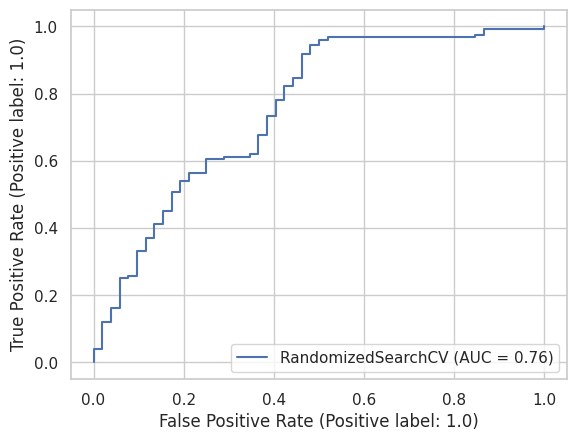

In [125]:
# ROC Curve and AUC Score:
RocCurveDisplay.from_estimator(estimator=rs_log_reg,
                               X=X_test,
                               y=y_test)

plt.show()

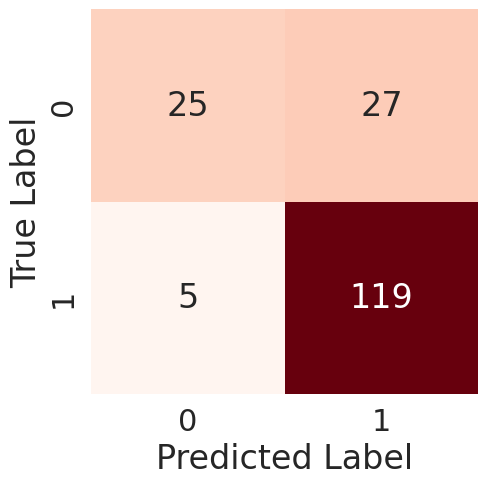

In [126]:
# Create confusion matrix with Seaborn:
sns.set(font_scale=2)

def plot_confusion_matrix(y_true, y_preds):
    """
    Plot confusion matrix with a Seaborn heatmap.
    """
    fig, ax = plt.subplots(figsize=(5, 5))
    ax = sns.heatmap(confusion_matrix(y_true, y_preds),
                     annot=True,
                     fmt="d",
                     cmap="Reds",
                     cbar=False)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    
print("\n")
plot_confusion_matrix(y_test, y_preds)

In [127]:
# Classification report:

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

         0.0       0.83      0.48      0.61        52
         1.0       0.82      0.96      0.88       124

    accuracy                           0.82       176
   macro avg       0.82      0.72      0.75       176
weighted avg       0.82      0.82      0.80       176



In [128]:
# Find the best parameters:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [132]:
# New Logistic Regression Model using the best params:

clf = LogisticRegression(solver='liblinear',
                         C=0.23357214690901212)

In [133]:
# Cross validation for accuracy:

cross_validated_accuracy = cross_val_score(clf,
                                           X_train,
                                           y_train,
                                           cv=5,
                                           scoring='accuracy')
cross_validated_accuracy

array([0.76829268, 0.7804878 , 0.79268293, 0.81707317, 0.82926829])

In [134]:
cross_validated_accuracy = np.mean(cross_validated_accuracy)
cross_validated_accuracy

0.7975609756097561

In [135]:
# Cross validation precision:
cross_validated_precision = cross_val_score(clf,
                                            X_train,
                                            y_train,
                                            cv=5,
                                            scoring="precision")
cross_validated_precision = np.mean(cross_validated_precision)
cross_validated_precision

0.7815790946225729

In [136]:
# Cross validation recall:
cross_validated_recall = cross_val_score(clf,
                                         X_train,
                                         y_train,
                                         cv=5,
                                         scoring="recall")
cross_validated_recall = np.mean(cross_validated_recall)
cross_validated_recall

0.9786340852130326

In [137]:
# Cross validation f1-score:
cross_validated_f1 = cross_val_score(clf,
                                    X_train,
                                    y_train,
                                    cv=5,
                                    scoring="f1")
cross_validated_f1 = np.mean(cross_validated_f1)
cross_validated_f1

0.868998715618563

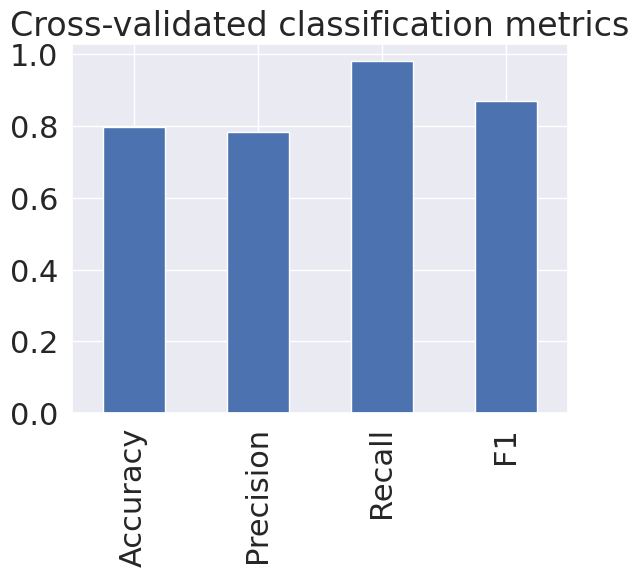

In [138]:
# Visualize the CV metrics:

cross_validated_metrics = pd.DataFrame({"Accuracy": cross_validated_accuracy,
                                        "Precision": cross_validated_precision,
                                        "Recall": cross_validated_recall,
                                        "F1": cross_validated_f1},
                                       index=[0])
cross_validated_metrics.T.plot.bar(title="Cross-validated classification metrics",
                                   legend=False);
plt.show()

Feature Importance:

In [140]:
# Fit an instance of Logistic Regression:
clf = LogisticRegression(solver='liblinear',
                         C=0.23357214690901212)

clf.fit(X_train, y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [141]:
clf.coef_

array([[-2.48356169e-01,  2.74775463e-01, -7.83392669e-02,
         2.54126450e-01, -1.24941741e-01, -4.12015451e-06,
        -5.99881283e-05, -2.22230446e-03, -2.35443784e-03,
         2.08687992e+00,  1.69341858e-01]])

In [142]:
# Match coef's to columns:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'Gender': -0.24835616890392267,
 'Married': 0.2747754629546363,
 'Dependents': -0.0783392668951352,
 'Education': 0.25412644983023314,
 'Self_Employed': -0.12494174113409921,
 'ApplicantIncome': -4.120154509787291e-06,
 'CoapplicantIncome': -5.9988128272169906e-05,
 'LoanAmount': -0.002222304459500172,
 'Loan_Amount_Term': -0.0023544378406653347,
 'Credit_History': 2.0868799223350845,
 'Property_Area': 0.16934185781740677}

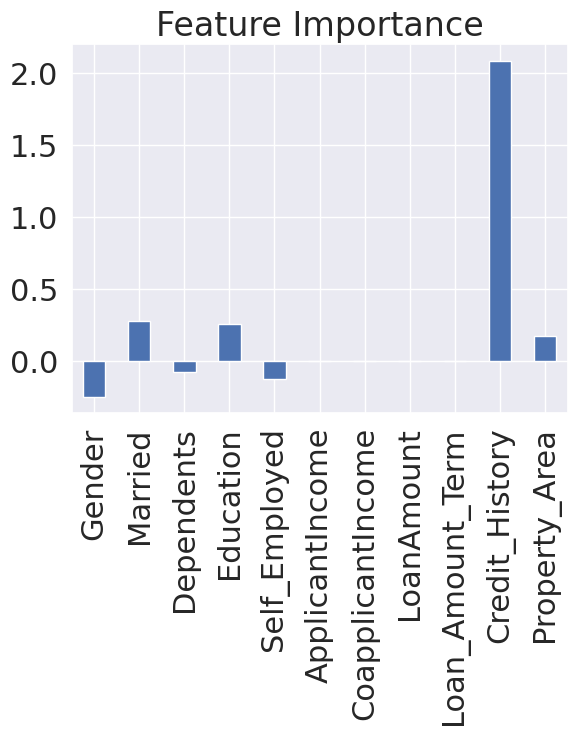

In [143]:
# Plot feature importance:

feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False)
plt.show()

# Business Recommendations:

* 1. The company should approach customers with good credit history.
* 2. The company should approach customers who are married.
* 3. The company should approach customers who are graduates.
* 4. The company should approach customers who live in the semi-urban-area
* 5. The comapny could consider approaching customers with few dependents
* 6. The company could consider approaching married men

# Appendix: Report/ Findings

* The majority of people in the dataset do have home loans.
* The majority of dataset applicant gender is Male's who apply for home loans, at 81.36 %
* The number of married men who applied for home loans is: 256
 
* The distribution of `ApplicantIncome` and `CoApplicantIncome` is skewed to the left
* ` LoanAmount` has a normal distribution and is could be skewed due to outliers.
* `Applicant` and `CoApplicantIncome` seems to be equal for individuals who have a home loan

* The majority of loans are from the `semi-urban area`, with rural property area having the least loans.
* `Graduates have more loans` than that of individuals who are not graduates.

* It seems that as the `applicant income increases, the loan amount tends to increase` as well.
* The most popular `Loan Amount Term is 360` by far.
* `Loan status` seems to `decrease` as `dependents increase`. The majority of Y status has 0 dependents.